### 谱计算

### 0.导入函数库

In [1]:
%matplotlib inline
from obspy.core import read
from obspy import read_inventory
from obspy.imaging.cm import pqlx
from obspy.signal.invsim import cosine_taper 
from obspy.signal.filter import lowpass
from obspy.signal.spectral_estimation import PPSD
from matplotlib import rcParams
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = 15, 7
rcParams["figure.subplot.hspace"] = (0.5)

### 1.瞬时谱计算
****
瞬时谱是一种可视化方法，可以同时展示信号在时间和频率上的特征。通过谱图，可以观察到地震信号的频率成分随时间的变化情况，从而更好地理解地震事件的动态过程。
****

[[1.76306503e-10 1.67835097e-10 1.59788405e-10 ... 1.14074938e-08
  1.13911521e-08 1.14709441e-08]
 [8.93528612e-11 8.47546353e-11 8.08873621e-11 ... 5.77571833e-09
  5.76628062e-09 5.80159984e-09]
 [1.32083770e-15 2.19217966e-15 1.26836784e-15 ... 4.61049256e-14
  6.49745604e-14 3.53132892e-14]
 ...
 [5.88053994e-25 1.18801614e-23 7.92001588e-24 ... 1.09119112e-22
  3.01932783e-23 1.00821960e-24]
 [7.75857767e-25 2.62560164e-24 6.49094147e-23 ... 2.50191763e-22
  6.67146382e-23 8.83059665e-24]
 [3.25582662e-24 6.80391296e-24 5.37204931e-24 ... 6.17710018e-23
  7.27357065e-24 1.89697731e-23]] [ 0.        0.078125  0.15625   0.234375  0.3125    0.390625  0.46875
  0.546875  0.625     0.703125  0.78125   0.859375  0.9375    1.015625
  1.09375   1.171875  1.25      1.328125  1.40625   1.484375  1.5625
  1.640625  1.71875   1.796875  1.875     1.953125  2.03125   2.109375
  2.1875    2.265625  2.34375   2.421875  2.5       2.578125  2.65625
  2.734375  2.8125    2.890625  2.96875   3.04687

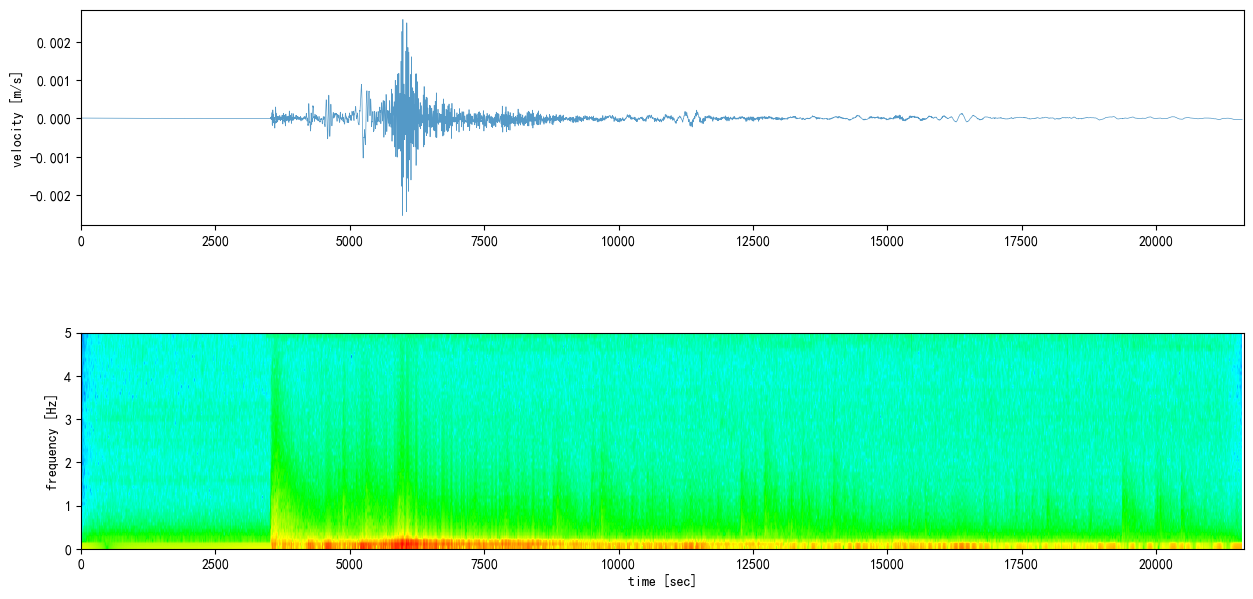

In [3]:
# matplotlib 计算谱图的函数
st = read("../data/spect_trace.mseed")
# 去仪器响应
inv = read_inventory("../data/GR.WET.xml")
st.remove_response(output="VEL", inventory=inv)
st.detrend('linear')
st.detrend('demean')

tr = st[0]
NFFT = 256     # 谱图窗长度
noverlap = 50  # 滑动窗口重叠点数量，必须小于NFFT
xstart = 0     # X轴起始点
xend = 21627   # 信号长度，单位为秒

# 绘图
ax1 = plt.subplot(211)
plt.plot(tr.times(), tr.data, linewidth=0.5, color="#5499C7")
plt.ylabel('velocity [m/s]')

plt.subplot(212, sharex=ax1)
# Pxx： 表示瞬时功率的二维数组，其中行表示时间段，列表示频率
# freqs： 频率向量
# bins： 计算功率的时间区间的中心点
# im： matplotlib.image.AxesImage实例
Pxx, freqs, bins, im = plt.specgram(tr.data, NFFT=NFFT, Fs=tr.stats.sampling_rate, 
                                    noverlap=noverlap, cmap=pqlx)
print(Pxx, freqs, bins)
plt.ylabel('frequency [Hz]')
plt.xlabel('time [sec]')

# 调整Y轴范围
plt.ylim(0,5)
plt.xlim(xstart, xend)
plt.show()

(0.0, 1.0)

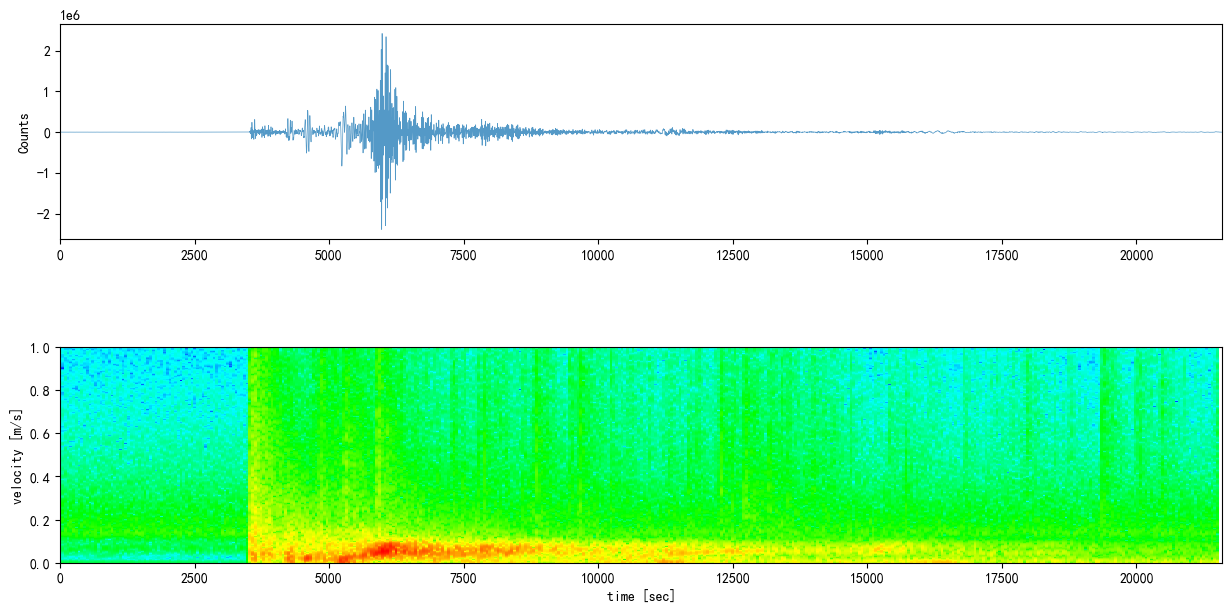

In [3]:
# Obspy 计算谱图的函数
st = read("../data/spect_trace.mseed")
tr = st[0]

ax1 = plt.subplot(211)
plt.plot(tr.times(), tr.data, linewidth=0.5, color="#5499C7")
plt.ylabel('Counts')

ax2 = plt.subplot(212, sharex=ax1)
fig = tr.spectrogram(wlen=100, per_lap=0.5, dbscale=True, cmap=pqlx, axes=ax2, show=False)
plt.xlabel('time [sec]')
plt.ylabel('velocity [m/s]')
plt.ylim(0,1.0)

(0.0, 50.0)

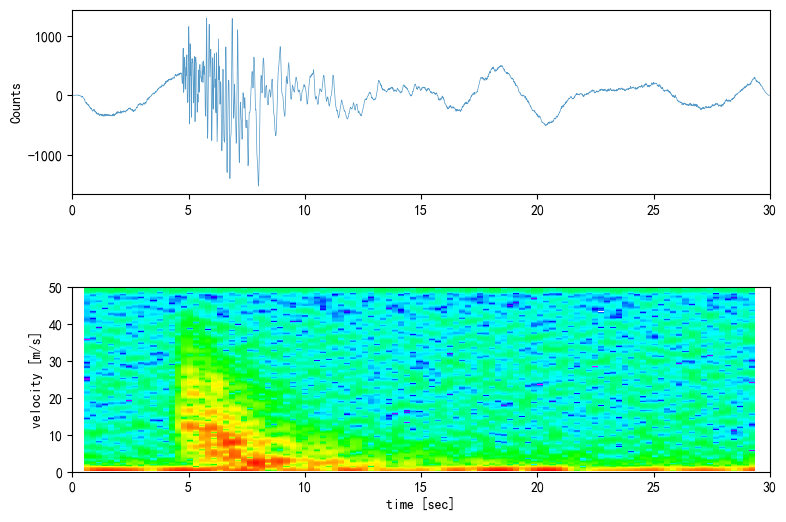

In [98]:
# Obspy 计算谱图的函数
st = read("../data/test_trace.mseed")
tr = st[0]

ax1 = plt.subplot(211)
plt.plot(tr.times(), tr.data, linewidth=0.5, color="#5499C7")
plt.ylabel('Counts')

ax2 = plt.subplot(212, sharex=ax1)
fig = tr.spectrogram(per_lap=0.8, wlen=1, dbscale=True, axes=ax2, mult=10.0, cmap=pqlx)
plt.xlabel('time [sec]')
plt.ylabel('velocity [m/s]')
plt.ylim(0,50)

### 2.PDF计算

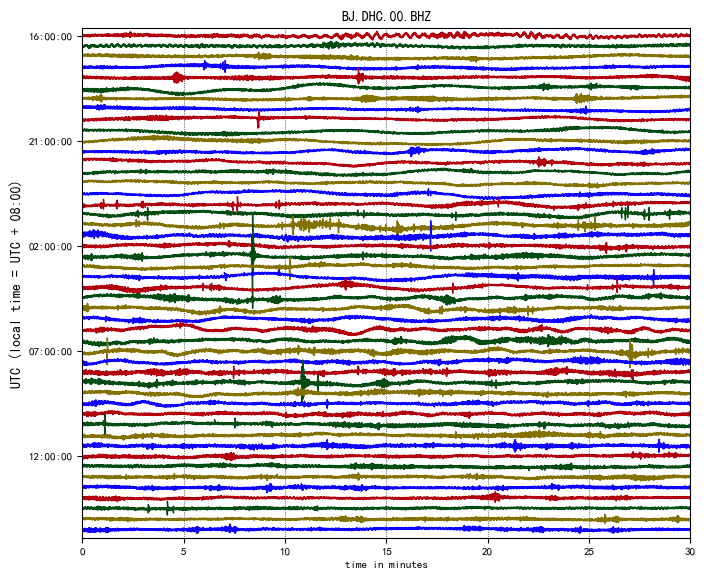

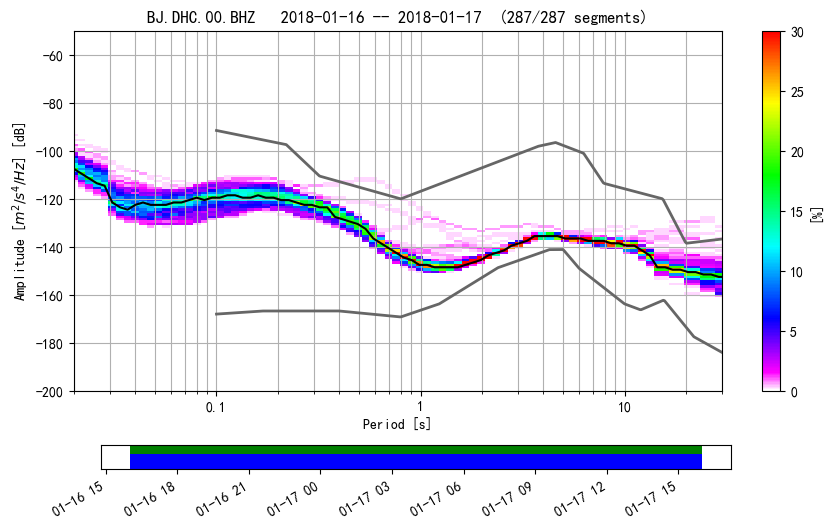

In [161]:
plt.rcParams['figure.figsize'] = 9, 6
#st = read("../data/BJ.DHC.00.BHZ.20180819000002.mseed")
st = read("../data/BJ.DHC.2018016160000.D.00.BHZ.mseed")

tr = st[0]
tr.plot(type='dayplot', interval=30)

invs = read_inventory("../data/BJ.XML")
inv = invs.select(network="BJ", station="DHC", location="00", channel="BHZ")

ppsd = PPSD(stats=tr.stats, 
            metadata=inv,
            db_bins=(-200, -50, 1.0), 
            period_limits=(0.02, 50),
            ppsd_length=600.0, 
            overlap=0.5
            )

ppsd.add(tr)

ppsd.plot(show_noise_models=True,
          grid=True,
          show_mode=True,
          #show_mean=True,
          #cumulative=True,
          xaxis_frequency=False,
          period_lim=(0.02, 30),
          cmap=pqlx
          )

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


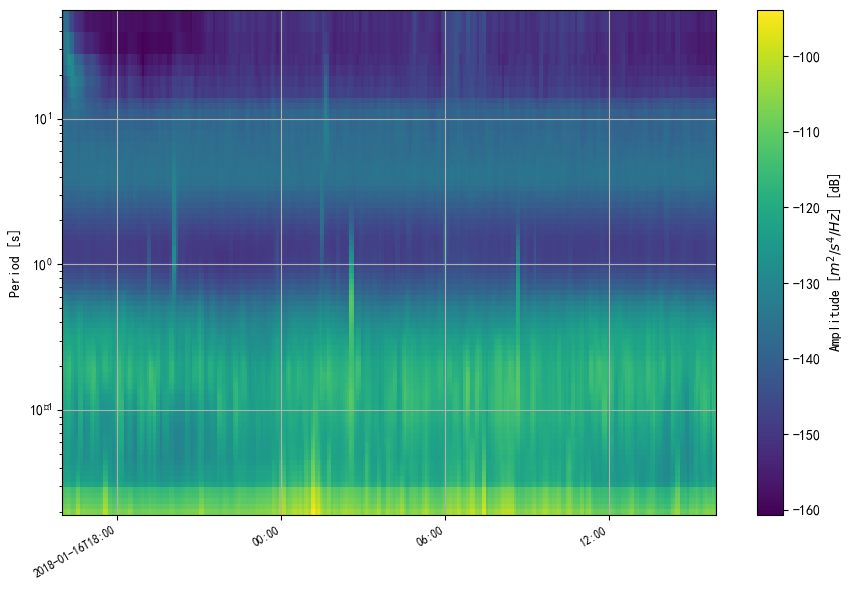

In [68]:
ppsd.plot_spectrogram()

### 3.PSD计算

[-31.38188305 -29.92285176 -31.70707834 ... -96.07283488 -92.17022571
 -85.14763801] [2.00000000e-02 2.00000191e-02 2.00000381e-02 ... 6.99050667e+03
 1.04857600e+04 2.09715200e+04]


Text(0, 0.5, 'Power (dB/Hz)')

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


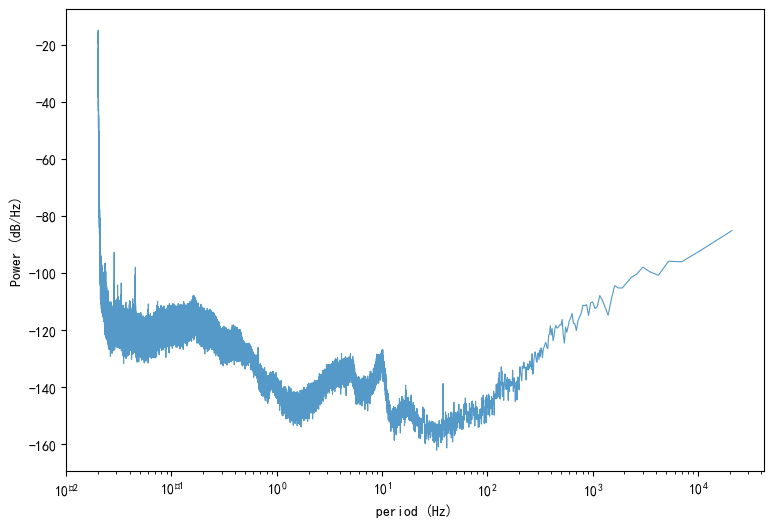

In [10]:
import comput_psd as cpsd
plt.rcParams['figure.figsize'] = 9, 6

st = read("../data/BJ.DHC.2018016160000.D.00.BHZ.mseed")
tr = st[0]
invs = read_inventory("../data/BJ.XML")
inv = invs.select(network="BJ", station="DHC", location="00", channel="BHZ")

psd_periods = None
# psd_periods = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 15, 20]
# psd_periods = list(np.arange(0.01, 20, 0.01))
psd_data, psd_periods = cpsd.trace_psd(tr, inv, psd_periods)
print(psd_data, psd_periods)

# 绘图
plt.plot(psd_periods, psd_data, linewidth=0.8, color="#5499C7")
plt.xscale('log')
plt.xlabel('period (Hz)')
plt.ylabel('Power (dB/Hz)')